In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns

from keras.models import load_model


from keras.layers import LSTM, GRU, Dense
from keras.models import Sequential
import keras.backend as K
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split

In [2]:
LR = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/LR_100/*.csv')
RL = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/RL_100/*.csv')
UP = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/UP_100/*.csv')
Down = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/Down_100/*.csv')
BA = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/BA_100/*.csv')
DA = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/DA_100/*.csv')
AD = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/AD_100/*.csv')
AB = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/AB_100/*.csv')
CD = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/CD_100/*.csv')
CB = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/CB_100/*.csv')

len(LR), len(RL), len(UP), len(Down), len(BA), len(DA), len(AD), len(AB), len(CD), len(CB)

(100, 100, 100, 100, 100, 100, 100, 100, 100, 100)

In [3]:
total_data = LR + RL + UP + Down + BA + DA + AD + AB + CD + CB
dataset = np.zeros((len(total_data), 100, 4))

for i, data in enumerate(total_data):
    tmp = pd.read_csv(data, names=['n','a','b','c','d']).sample(n=100, replace=True).sort_index().iloc[:,1:5]
    dataset[i] = tmp
    
label = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * len(LR) + [[0, 1, 0 ,0, 0, 0, 0, 0, 0, 0]] * len(RL) 
                 + [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]] * len(UP) + [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]] * len(Down) 
                 + [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]] * len(BA) + [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]] * len(DA) 
                 + [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]] * len(AD) + [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]] * len(AB) 
                 + [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] * len(CD) + [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]] * len(CB) )
dataset.shape, label.shape

((1000, 100, 4), (1000, 10))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, random_state=0, test_size=0.3)

callback = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001), 
    ModelCheckpoint(filepath='./weights.h5', save_best_only=True),
    EarlyStopping(monitor='val_acc', restore_best_weights=True, patience=5)
]

In [34]:
K.clear_session()
model_once = 0

In [35]:
model_once = Sequential()
model_once.add(GRU(20, input_shape=(100,4)))
model_once.add(Dense(32,activation='relu')) 
model_once.add(Dense(128,activation='relu')) 
model_once.add(Dense(64,activation='relu')) 
model_once.add(Dense(10, activation='softmax'))
model_once.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['acc'])

result = model_once.fit(X_train, y_train, validation_split=0.33, epochs=60, batch_size=10, verbose=1)
#result = model_once.fit(X_train, y_train, epochs=35, verbose=2)

Epoch 1/60
47/47 [==============================] - 3s 29ms/step - loss: 2.3223 - acc: 0.1026 - val_loss: 2.2736 - val_acc: 0.1207
Epoch 2/60
47/47 [==============================] - 1s 24ms/step - loss: 2.2464 - acc: 0.1474 - val_loss: 2.1643 - val_acc: 0.1681
Epoch 3/60
47/47 [==============================] - 1s 25ms/step - loss: 2.1187 - acc: 0.1816 - val_loss: 1.9877 - val_acc: 0.2198
Epoch 4/60
47/47 [==============================] - 1s 24ms/step - loss: 1.9277 - acc: 0.2372 - val_loss: 1.7020 - val_acc: 0.3405
Epoch 5/60
47/47 [==============================] - 1s 24ms/step - loss: 1.3093 - acc: 0.4594 - val_loss: 0.9841 - val_acc: 0.6078
Epoch 6/60
47/47 [==============================] - 1s 23ms/step - loss: 0.8972 - acc: 0.6517 - val_loss: 0.8864 - val_acc: 0.6552
Epoch 7/60
47/47 [==============================] - 1s 23ms/step - loss: 0.6197 - acc: 0.7073 - val_loss: 0.5861 - val_acc: 0.7414
Epoch 8/60
47/47 [==============================] - 1s 23ms/step - loss: 0.3833 - a

In [36]:
model_once.evaluate(X_test, y_test)

predict_x=model_once.predict(X_test) 
classes_x_test=np.argmax(predict_x,axis=1)

10/10 [==============================] - 0s 9ms/step - loss: 0.0130 - acc: 0.9933


In [37]:
classes_y_test = []
for i in range(len(y_test)):
    for j in range(10):  #num class 
        if y_test[i][j] == 1:
            classes_y_test.append(j)

count=0
print("Real value : Prediction\n---------------------------")
for i in range(len(X_test)):
    if(classes_x_test[i] != classes_y_test[i]):
        print("   ",classes_y_test[i], "\t   : \t", classes_x_test[i])
        
        count = count + 1
probab = count/len(X_test)
print("\n\nNumber of miscalculation : ",count,"/",len(classes_x_test),"=",round(probab,3))
print("\nAccuracy : ",((1-round(probab,4))*100),"%")
print("0 : LR, 1 : RL, 2 : UP, 3 : DOWN, 4: Left to Down, 5: Right to Down, 6: Down to Right, 7: Down to Left, 8: Up to Right, 9: Up to Left")

Real value : Prediction
---------------------------
    5 	   : 	 6
    3 	   : 	 4


Number of miscalculation :  2 / 300 = 0.007

Accuracy :  99.33 %
0 : LR, 1 : RL, 2 : UP, 3 : DOWN, 4: Left to Down, 5: Right to Down, 6: Down to Right, 7: Down to Left, 8: Up to Right, 9: Up to Left


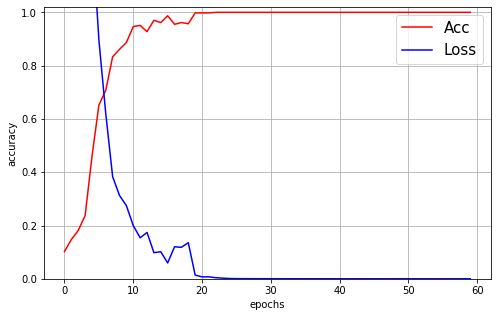

In [38]:
plt.figure(figsize=(8,5))
val_loss = result.history['loss']
val_acc = result.history['acc']

plt.plot(val_acc, label='Acc', color='red')
plt.plot(val_loss, label='Loss', color='blue')

plt.ylim(0,1.02)
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(fontsize=15)
plt.show()

In [39]:
np.array(val_acc)

array([0.1025641 , 0.1474359 , 0.18162394, 0.23717949, 0.4594017 ,
       0.65170938, 0.70726496, 0.83333331, 0.8611111 , 0.88675213,
       0.94658118, 0.95085472, 0.9273504 , 0.97008544, 0.96153843,
       0.98717946, 0.95512819, 0.96153843, 0.95726496, 0.99786323,
       0.99786323, 0.99786323, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [40]:
np.array(val_loss)

array([2.32226944e+00, 2.24642634e+00, 2.11866450e+00, 1.92771375e+00,
       1.30932462e+00, 8.97199690e-01, 6.19673193e-01, 3.83268267e-01,
       3.12728792e-01, 2.74516284e-01, 1.99537739e-01, 1.53878227e-01,
       1.73948795e-01, 9.81035829e-02, 1.01525366e-01, 5.93751743e-02,
       1.20065317e-01, 1.18220486e-01, 1.35422230e-01, 1.39058409e-02,
       7.22465571e-03, 7.38541503e-03, 4.08412004e-03, 2.48762732e-03,
       1.14478834e-03, 6.14322780e-04, 5.09665348e-04, 4.37782699e-04,
       3.79478704e-04, 3.34754848e-04, 2.97293940e-04, 2.70210818e-04,
       2.47109740e-04, 2.24099902e-04, 2.06233206e-04, 1.89461352e-04,
       1.76258400e-04, 1.64443845e-04, 1.53798348e-04, 1.43876605e-04,
       1.36046103e-04, 1.27424617e-04, 1.18788099e-04, 1.13155867e-04,
       1.04618513e-04, 9.99327895e-05, 9.48884190e-05, 8.92297539e-05,
       8.58110943e-05, 8.03829025e-05, 7.67521706e-05, 7.35663561e-05,
       6.99950033e-05, 6.64563704e-05, 6.34745957e-05, 6.07378461e-05,
      

In [ ]:
gru_acc = [97.33, 99.33, 99.67, 98, 98, 99.67, 98.33, 99, 99.33, 98.67, 98.33, 
           99, 98.33, 100, 99, 98, 98.67, 98.67, 99.33, 98.33, 99.67, 99, 99.33, 99.33, 98.67, 99, 99.33, 98.67, ]

converge_epoch = [20, 18, 29, 21, 22, 32, 23, 15, 20, 15, 14, 20, 23, 21, 28, 15,22, 18, 25, 13, 14, 22, 24, 18, 16, 16]


In [42]:
acc1 = [0.10042735, 0.11324786, 0.16239317, 0.15170941, 0.23717949,       0.34829059, 0.57051283, 0.74572647, 0.8162393 , 0.88461536,       0.91880339, 0.95940173, 0.94017094, 0.9636752 , 0.97222221,       0.97435898, 0.97649574, 0.98931623, 0.98076922, 0.98504275,       0.99786323, 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc2 = [0.0982906 , 0.12820514, 0.17094018, 0.20299146, 0.2820513 ,       0.32692307, 0.4594017 , 0.65170938, 0.75641024, 0.76709402,       0.85470086, 0.89102566, 0.90170938, 0.92307693, 0.94658118,       0.94658118, 0.90811968, 0.98717946, 0.99145299, 0.95726496,       0.97863245, 0.97222221, 0.97863245, 0.98290598, 0.97008544,       0.98931623, 1.        , 0.99572647, 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc3 = [0.13034189, 0.14102565, 0.15811966, 0.16880342, 0.22222222,       0.33974358, 0.60470086, 0.86324787, 0.95085472, 0.98290598,       0.97649574, 0.9337607 , 0.94871795, 0.97435898, 0.99572647,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc4 = [0.08760684, 0.11752137, 0.14529915, 0.17307693, 0.21581197,       0.40384614, 0.66666669, 0.80341882, 0.91666669, 0.9337607 ,       0.90598291, 0.98076922, 0.99358976, 0.99786323, 0.99358976,       0.98931623, 0.95940173, 0.98290598, 0.98931623, 0.99145299,       0.99572647, 0.99145299, 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc5 = [0.08760684, 0.11752137, 0.14529915, 0.17307693, 0.21581197,       0.40384614, 0.66666669, 0.80341882, 0.91666669, 0.9337607 ,       0.90598291, 0.98076922, 0.99358976, 0.99786323, 0.99358976,       0.98931623, 0.95940173, 0.98290598, 0.98931623, 0.99145299,       0.99572647, 0.99145299, 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc6 = [0.14102565, 0.16666667, 0.17735043, 0.24145299, 0.47863248,       0.57905984, 0.64316237, 0.83119661, 0.97008544, 0.97008544,       0.9636752 , 0.97222221, 0.96153843, 0.97863245, 0.99358976,       0.99145299, 0.98290598, 0.99145299, 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc7 = [0.11111111, 0.14102565, 0.20726496, 0.26282051, 0.36324787,       0.58974361, 0.79914528, 0.92307693, 0.94230771, 0.96153843,       0.97222221, 0.98504275, 0.98717946, 0.97435898, 0.94658118,       0.99145299, 0.99358976, 0.98931623, 0.94871795, 0.97863245,       0.97649574, 0.97649574, 0.99358976, 0.99572647, 0.99358976,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc8 = [0.08119658, 0.12606838, 0.16666667, 0.25      , 0.48076922,       0.69017094, 0.82051283, 0.8974359 , 0.93162394, 0.96153843,       0.98504275, 0.97008544, 0.96153843, 0.98717946, 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc9 = [0.1025641 , 0.16880342, 0.17307693, 0.33760685, 0.48931623,       0.65170938, 0.76923078, 0.87606835, 0.91025639, 0.97863245,       0.98290598, 0.95726496, 0.97435898, 0.98931623, 0.99786323,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc10 = [0.11965812, 0.1431624 , 0.17948718, 0.33333334, 0.4594017 ,       0.5       , 0.56837606, 0.6474359 , 0.7136752 , 0.71153843,       0.76282054, 0.80769229, 0.83547008, 0.88675213, 0.94871795,       0.94230771, 0.97649574, 0.95726496, 0.98290598, 0.98717946,       0.98504275, 0.99786323, 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc11 = [0.09615385, 0.15384616, 0.20726496, 0.31410256, 0.41239315,       0.60042733, 0.77991456, 0.90170938, 0.93162394, 0.90811968,       0.95726496, 0.97649574, 0.99145299, 0.99145299, 0.97008544,       0.96794873, 0.95940173, 0.98931623, 0.98717946, 0.97863245,       0.99572647, 0.99145299, 0.99572647, 0.99572647, 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc12 = [0.0940171 , 0.13034189, 0.14102565, 0.20299146, 0.39957264,       0.57478631, 0.76923078, 0.91452992, 0.93589741, 0.95726496,       0.97222221, 0.97649574, 0.98717946, 0.99358976, 0.99572647,       1.        , 0.99358976, 0.99358976, 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc13 = [0.10683761, 0.13461539, 0.18803419, 0.27991453, 0.45299146,       0.63461536, 0.73290598, 0.88247865, 0.94658118, 0.95512819,       0.95299143, 0.99358976, 0.97008544, 0.95940173, 0.99572647,       0.99572647, 0.99786323, 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc14 = [0.10470086, 0.1388889 , 0.16452992, 0.17307693, 0.35470086,       0.52136755, 0.67094016, 0.81837606, 0.93589741, 0.96794873,       0.98717946, 0.99358976, 0.9337607 , 0.95726496, 0.99572647,       0.99358976, 1.        , 1.        , 1.        , 1.        ,      1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc15 = [0.13034189, 0.16025642, 0.18589744, 0.2863248 , 0.42735043,       0.66452992, 0.73931623, 0.79914528, 0.85897434, 0.93589741,       0.97222221, 0.96794873, 0.93803418, 0.95299143, 0.96794873,       0.98290598, 0.99572647, 0.99572647, 0.99572647, 0.99572647,       0.98290598, 0.96794873, 0.98931623, 0.99572647, 0.97649574,       0.98931623, 0.98931623, 0.99572647, 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]
acc16 = [0.1025641 , 0.1474359 , 0.18162394, 0.23717949, 0.4594017 ,       0.65170938, 0.70726496, 0.83333331, 0.8611111 , 0.88675213,       0.94658118, 0.95085472, 0.9273504 , 0.97008544, 0.96153843,       0.98717946, 0.95512819, 0.96153843, 0.95726496, 0.99786323,       0.99786323, 0.99786323, 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ,       1.        , 1.        , 1.        , 1.        , 1.        ]

In [43]:
loss1 = [2.31660080e+00, 2.27917647e+00, 2.25162005e+00, 2.17607450e+00,       1.85277867e+00, 1.52342737e+00, 1.03455830e+00, 5.99839449e-01,       4.14820582e-01, 2.91992545e-01, 1.83375135e-01, 1.19757675e-01,       1.84841022e-01, 8.18154886e-02, 9.41232666e-02, 1.39337093e-01,       7.07102194e-02, 3.81606743e-02, 7.84171671e-02, 7.81072229e-02,       1.08520733e-02, 3.15015879e-03, 1.07715477e-03, 7.93898886e-04,       6.47517329e-04, 5.49586839e-04, 4.81973722e-04, 4.26557177e-04,       3.79250851e-04, 3.40851460e-04, 3.07616225e-04, 2.80505948e-04,       2.54902785e-04, 2.34552383e-04, 2.15718057e-04, 1.99445087e-04,       1.84144723e-04, 1.71829073e-04, 1.60128882e-04, 1.49443949e-04,       1.39848082e-04, 1.30847475e-04, 1.22807629e-04, 1.15573865e-04,       1.09020002e-04, 1.02782491e-04, 9.70613110e-05, 9.16389545e-05,       8.69060750e-05, 8.28775956e-05, 7.81269264e-05, 7.44125864e-05,       7.08099251e-05, 6.77354619e-05, 6.41509105e-05, 6.10574716e-05,       5.83100409e-05, 5.55908628e-05, 5.31541009e-05, 5.08524645e-05]
loss2 = [2.30356741e+00, 2.24223900e+00, 2.18789053e+00, 2.01803327e+00,       1.76719642e+00, 1.49186277e+00, 1.23911035e+00, 7.66834557e-01,       5.35729885e-01, 5.11114120e-01, 2.81471133e-01, 2.30459899e-01,       2.05761105e-01, 1.50456488e-01, 1.57982841e-01, 1.35874808e-01,       2.82024652e-01, 6.81857243e-02, 3.46157663e-02, 1.22500926e-01,       9.13933665e-02, 1.01984739e-01, 7.26900697e-02, 7.23785833e-02,       9.78725329e-02, 3.40850279e-02, 6.78805448e-03, 1.00955097e-02,       1.93360576e-03, 6.04559784e-04, 4.21032426e-04, 3.35586112e-04,       2.77695886e-04, 2.35702159e-04, 2.03628661e-04, 1.79075956e-04,       1.59451272e-04, 1.41848781e-04, 1.30132466e-04, 1.17440904e-04,       1.07426509e-04, 9.94682850e-05, 9.23704065e-05, 8.49011776e-05,       7.88640609e-05, 7.43695127e-05, 6.91004316e-05, 6.51712398e-05,       6.11086216e-05, 5.77552382e-05, 5.44036266e-05, 5.14016065e-05,       4.87652287e-05, 4.61815616e-05, 4.39526630e-05, 4.16245421e-05,       3.96311989e-05, 3.76740027e-05, 3.59219193e-05, 3.42632993e-05]
loss3 = [2.30434418e+00, 2.24947095e+00, 2.22134829e+00, 2.15326595e+00,       1.96687543e+00, 1.61567080e+00, 9.53247786e-01, 3.89086962e-01,       1.66670173e-01, 6.87566325e-02, 5.93676157e-02, 2.37063035e-01,       1.82393715e-01, 6.21949397e-02, 1.22057842e-02, 4.38914634e-03,       1.96665153e-03, 1.30501657e-03, 8.86103837e-04, 5.68014919e-04,       4.61887510e-04, 3.89439723e-04, 3.37504083e-04, 2.91571545e-04,       2.64106144e-04, 2.38721332e-04, 2.07016448e-04, 1.85880082e-04,       1.68242012e-04, 1.55487985e-04, 1.42101402e-04, 1.29984808e-04,       1.20059623e-04, 1.11216570e-04, 1.04673985e-04, 9.69930989e-05,       9.05625857e-05, 8.54524114e-05, 8.02968352e-05, 7.48193124e-05,       7.04423437e-05, 6.66239648e-05, 6.26465480e-05, 5.97400685e-05,       5.63819776e-05, 5.32726153e-05, 5.00591777e-05, 4.72819265e-05,       4.47363818e-05, 4.25433282e-05, 4.00575336e-05, 3.77114229e-05,       3.56081764e-05, 3.42249441e-05, 3.23631357e-05, 3.07205846e-05,       2.91693395e-05, 2.78509870e-05, 2.66121842e-05, 2.53629041e-05]
loss4 = [2.31815577e+00, 2.27620625e+00, 2.22178268e+00, 2.18131852e+00,       1.98009932e+00, 1.52183104e+00, 8.41953635e-01, 4.77614164e-01,       2.21472666e-01, 1.68827966e-01, 2.66348124e-01, 7.19064251e-02,       2.58179717e-02, 9.42067523e-03, 1.46522988e-02, 3.56438309e-02,       1.64879501e-01, 6.51865304e-02, 4.52697165e-02, 2.45280713e-02,       2.07419228e-02, 2.30644438e-02, 3.18907923e-03, 4.57586430e-04,       3.43038002e-04, 2.71060941e-04, 2.26020813e-04, 1.95104105e-04,       1.71321153e-04, 1.52772554e-04, 1.37369876e-04, 1.24965052e-04,       1.14478746e-04, 1.04963583e-04, 9.74887007e-05, 9.02022803e-05,       8.44118767e-05, 7.85509983e-05, 7.35602516e-05, 6.91349851e-05,       6.50937000e-05, 6.14133387e-05, 5.80773485e-05, 5.50458863e-05,       5.21839975e-05, 4.94247288e-05, 4.69534134e-05, 4.46555932e-05,       4.24746613e-05, 4.04624407e-05, 3.87235450e-05, 3.69564586e-05,       3.52871066e-05, 3.37165729e-05, 3.22656560e-05, 3.09662246e-05,       2.96876333e-05, 2.85454626e-05, 2.73440546e-05, 2.62352660e-05]
loss5 = [2.29308653e+00, 2.22427058e+00, 2.10679674e+00, 1.87859094e+00,       1.29708803e+00, 9.26900148e-01, 7.34911442e-01, 3.95038277e-01,       1.10800765e-01, 1.01117387e-01, 1.10283509e-01, 8.75082538e-02,       8.72307867e-02, 5.31035177e-02, 1.82967447e-02, 2.39035506e-02,       9.81230959e-02, 4.02653068e-02, 3.84955225e-03, 9.98374540e-04,       6.82752230e-04, 5.46613068e-04, 4.61798802e-04, 4.00472229e-04,       3.46756453e-04, 3.07193521e-04, 2.76147563e-04, 2.47182936e-04,       2.24815100e-04, 2.05683536e-04, 1.87692727e-04, 1.72453510e-04,       1.59559233e-04, 1.48549225e-04, 1.37517243e-04, 1.28145926e-04,       1.19832890e-04, 1.12382237e-04, 1.05284176e-04, 9.90808039e-05,       9.32117109e-05, 8.79799845e-05, 8.31343568e-05, 7.86716701e-05,       7.43777055e-05, 7.06986393e-05, 6.70334412e-05, 6.37289049e-05,       6.07673901e-05, 5.77130086e-05, 5.49232682e-05, 5.24639981e-05,       4.99765774e-05, 4.77674221e-05, 4.56802409e-05, 4.36762712e-05,       4.18431373e-05, 4.00919307e-05, 3.84377381e-05, 3.67283283e-05]
loss6 = [2.29737449e+00, 2.21341562e+00, 2.07317209e+00, 1.77451265e+00,       1.47315514e+00, 1.04870927e+00, 5.38556159e-01, 2.31927454e-01,      1.93380624e-01, 1.47383884e-01, 1.14773527e-01, 5.88729009e-02,       3.23442630e-02, 9.60778892e-02, 2.23025545e-01, 2.62434650e-02,       2.18326021e-02, 3.73743363e-02, 1.57197952e-01, 1.36494517e-01,       7.83229396e-02, 7.35992938e-02, 3.70895080e-02, 2.09986977e-02,       1.20453304e-02, 3.58941499e-03, 5.99651132e-04, 4.38917283e-04,       3.62971274e-04, 3.04706278e-04, 2.66717776e-04, 2.35840183e-04,       2.11197068e-04, 1.90162318e-04, 1.72549990e-04, 1.57668954e-04,       1.44787089e-04, 1.33502108e-04, 1.23394289e-04, 1.14759103e-04,       1.07000342e-04, 9.99581680e-05, 9.36056895e-05, 8.79470608e-05,       8.24489980e-05, 7.76039597e-05, 7.33712222e-05, 6.92514441e-05,       6.56169286e-05, 6.21024665e-05, 5.89090050e-05, 5.60527915e-05,       5.32517915e-05, 5.07458681e-05, 4.84855300e-05, 4.62418902e-05,       4.40502881e-05, 4.20404540e-05, 4.01936086e-05, 3.84266496e-05]
loss7 = [2.31096697e+00, 2.25453615e+00, 2.14423370e+00, 1.90937555e+00,       1.32107329e+00, 6.78203702e-01, 4.07023787e-01, 2.67586559e-01,      1.92187160e-01, 1.47380769e-01, 4.33495678e-02, 1.00467175e-01,       1.57570273e-01, 3.70550454e-02, 2.17762007e-03, 7.36268179e-04,       5.07877790e-04, 3.79032310e-04, 3.08005343e-04, 2.55760504e-04,       2.18224246e-04, 1.89842394e-04, 1.63117540e-04, 1.48431078e-04,       1.30305023e-04, 1.17180352e-04, 1.07479289e-04, 9.59846293e-05,       8.97427308e-05, 8.16385000e-05, 7.54143257e-05, 6.91825990e-05,       6.41148072e-05, 5.97856306e-05, 5.61283414e-05, 5.21699694e-05,       4.93797488e-05, 4.54435467e-05, 4.31189546e-05, 4.04528146e-05,       3.84223895e-05, 3.61086713e-05, 3.44496912e-05, 3.24558641e-05,       3.07762202e-05, 2.91917295e-05, 2.79622236e-05, 2.64592491e-05,       2.53056805e-05, 2.41421949e-05, 2.30856404e-05, 2.19988087e-05,       2.09878217e-05, 2.01087641e-05, 1.93103515e-05, 1.85280114e-05,       1.78966457e-05, 1.70252242e-05, 1.62579145e-05, 1.56594215e-05]
loss8 =  [2.30715060e+00, 2.24395323e+00, 2.13082838e+00, 1.73791063e+00,       1.19554079e+00, 7.76865005e-01, 5.54858625e-01, 2.67461866e-01,       2.40990371e-01, 6.25768304e-02, 4.62058373e-02, 1.68373257e-01,       8.71165544e-02, 3.38789448e-02, 6.94586849e-03, 9.85404593e-04,       6.05638779e-04, 5.08947531e-04, 4.13896109e-04, 3.60004837e-04,       3.13921657e-04, 2.78992287e-04, 2.46984069e-04, 2.22661547e-04,       2.01176881e-04, 1.83544194e-04, 1.68033395e-04, 1.53537389e-04,       1.41852492e-04, 1.30963293e-04, 1.21477293e-04, 1.13294780e-04,       1.05356237e-04, 9.87423555e-05, 9.21705287e-05, 8.63244059e-05,       8.11969076e-05, 7.67517849e-05, 7.25964856e-05, 6.85329142e-05,       6.45360633e-05, 6.12280637e-05, 5.80356209e-05, 5.49807191e-05,       5.22560549e-05, 4.96623397e-05, 4.73675245e-05, 4.52579843e-05,       4.29459142e-05, 4.09735003e-05, 3.92888178e-05, 3.73065559e-05,       3.59244405e-05, 3.42017956e-05, 3.27333073e-05, 3.13089113e-05,       3.00538650e-05, 2.87738039e-05, 2.76807023e-05, 2.65588205e-05]
loss9 = [2.29547119e+00, 2.23734951e+00, 2.03928518e+00, 1.50694275e+00,       1.12993515e+00, 9.61086929e-01, 7.98164248e-01, 6.49789512e-01,       5.96494377e-01, 5.54100931e-01, 4.74711627e-01, 3.35232437e-01,       3.07876438e-01, 2.28080601e-01, 1.46965817e-01, 1.83796585e-01,       1.00026160e-01, 1.52299479e-01, 4.53554876e-02, 4.03070897e-02,       8.76879022e-02, 7.00719468e-03, 1.26392185e-03, 5.93921810e-04,       4.51812259e-04, 3.53212032e-04, 2.75225088e-04, 2.14562519e-04,       1.62811601e-04, 1.24406783e-04, 8.96379206e-05, 6.64638574e-05,       4.91752726e-05, 3.76607932e-05, 3.19777537e-05, 2.92759923e-05,       2.38020912e-05, 2.10950220e-05, 1.86456273e-05, 1.70655785e-05,       1.55188045e-05, 1.42636736e-05, 1.30482540e-05, 1.20809600e-05,       1.11108429e-05, 1.04007004e-05, 9.52968367e-06, 8.95455923e-06,       8.33816921e-06, 7.84000349e-06, 7.38635708e-06, 6.96967481e-06,       6.55094527e-06, 6.18541935e-06, 5.85329872e-06, 5.59503860e-06,       5.34948367e-06, 5.05709386e-06, 4.85052306e-06, 4.72722513e-06]
loss10 = [2.30203414e+00, 2.19975972e+00, 1.90719390e+00, 1.55219722e+00,       1.31323087e+00, 8.16856325e-01, 5.43101549e-01, 2.60757536e-01,       1.93867266e-01, 2.54392505e-01, 1.45482719e-01, 7.99376220e-02,       2.85436455e-02, 3.11063193e-02, 1.03410661e-01, 8.52884203e-02,       1.57774895e-01, 3.22705545e-02, 4.91947010e-02, 7.24891275e-02,       2.35399604e-02, 2.83102505e-02, 1.22126555e-02, 1.25963315e-02,       4.69530653e-03, 3.06780124e-03, 1.24847493e-03, 3.55967757e-04,       2.70242395e-04, 2.28355610e-04, 2.00039969e-04, 1.78323142e-04,       1.60289899e-04, 1.45617421e-04, 1.33692098e-04, 1.23700418e-04,       1.14164344e-04, 1.05777093e-04, 9.87184249e-05, 9.19520098e-05,       8.63313981e-05, 8.09670964e-05, 7.62122727e-05, 7.20607204e-05,       6.78505894e-05, 6.40988364e-05, 6.08896116e-05, 5.76353632e-05,       5.47006348e-05, 5.19968489e-05, 4.94613887e-05, 4.71928251e-05,       4.50096886e-05, 4.30103391e-05, 4.07770567e-05, 3.89354354e-05,       3.72935538e-05, 3.54140066e-05, 3.38842729e-05, 3.23718086e-05]
loss11 = [2.30914068e+00, 2.24474216e+00, 2.20143175e+00, 2.01377940e+00,       1.45078444e+00, 9.68219399e-01, 5.88655353e-01, 2.78737247e-01,       1.88417837e-01, 1.14145115e-01, 1.21955559e-01, 8.28519538e-02,       5.72589971e-02, 2.34227367e-02, 1.20178154e-02, 3.63680557e-03,       1.05519723e-02, 1.56383421e-02, 2.18683272e-03, 1.60229998e-03,       1.95275550e-03, 1.40043499e-03, 5.70639328e-04, 3.79476260e-04,       3.13985714e-04, 2.73573009e-04, 2.42638998e-04, 2.18524787e-04,       1.98784226e-04, 1.81566298e-04, 1.65871068e-04, 1.53268527e-04,       1.41762750e-04, 1.31713387e-04, 1.22119498e-04, 1.14111470e-04,       1.06641142e-04, 9.99188414e-05, 9.38906232e-05, 8.83668254e-05,       8.32028018e-05, 7.85196971e-05, 7.42873308e-05, 7.01051540e-05,       6.65691696e-05, 6.31533476e-05, 5.98274673e-05, 5.69639706e-05,       5.42892121e-05, 5.16646469e-05, 4.92251456e-05, 4.71258063e-05,       4.47852472e-05, 4.26989827e-05, 4.08224369e-05, 3.90519526e-05,       3.73581606e-05, 3.57307363e-05, 3.42071435e-05, 3.28719507e-05]
loss12 = [2.31136775e+00, 2.25023556e+00, 2.11529207e+00, 1.82037652e+00,       1.25382388e+00, 8.31636786e-01, 5.70026696e-01, 3.36589873e-01,       1.67315543e-01, 1.25450030e-01, 1.17499933e-01, 4.17610444e-02,       1.14249669e-01, 1.23601727e-01, 2.57985294e-02, 3.04705836e-02,       8.42621177e-03, 2.84935953e-03, 6.90961839e-04, 4.48205945e-04,       3.32366559e-04, 2.71250639e-04, 2.26351287e-04, 1.94509063e-04,       1.67779814e-04, 1.48409483e-04, 1.32832967e-04, 1.20188612e-04,       1.09002962e-04, 1.00216719e-04, 9.21757746e-05, 8.52629528e-05,       7.89322949e-05, 7.37146038e-05, 6.87525244e-05, 6.37515550e-05,       5.99008563e-05, 5.58935462e-05, 5.26511249e-05, 4.91834398e-05,       4.63060715e-05, 4.35744987e-05, 4.08867927e-05, 3.87084074e-05,       3.65954220e-05, 3.47054920e-05, 3.29246577e-05, 3.13342753e-05,       2.97370825e-05, 2.83189402e-05, 2.70632572e-05, 2.56426629e-05,       2.44582861e-05, 2.32993298e-05, 2.21851842e-05, 2.12000741e-05,       2.02232277e-05, 1.94435324e-05, 1.83129014e-05, 1.77754337e-05]
loss13 = [2.31118107e+00, 2.26445794e+00, 2.14617538e+00, 1.91368330e+00,       1.46927381e+00, 1.11302483e+00, 8.65436494e-01, 4.64106083e-01,       2.61526972e-01, 8.95486847e-02, 3.79408859e-02, 2.36460641e-02,       2.91463524e-01, 1.13453440e-01, 1.70398690e-02, 1.79869402e-02,       6.21272670e-03, 1.47986319e-03, 8.38348118e-04, 6.74013107e-04,       5.71064069e-04, 4.95073502e-04, 4.15840273e-04, 3.63001134e-04,       3.29027651e-04, 2.98143510e-04, 2.66779971e-04, 2.44416704e-04,       2.22955030e-04, 2.06866534e-04, 1.88692342e-04, 1.76114962e-04,       1.62316122e-04, 1.52118548e-04, 1.41864468e-04, 1.32925197e-04,       1.24356200e-04, 1.16512769e-04, 1.11079709e-04, 1.03730337e-04,       9.75732619e-05, 9.17510915e-05, 8.72609744e-05, 8.24355375e-05,       7.74678629e-05, 7.37692972e-05, 6.94451664e-05, 6.59929647e-05,       6.18241756e-05, 5.77092251e-05, 5.20255599e-05, 4.77165704e-05,       4.40203403e-05, 4.07471089e-05, 3.76877433e-05, 3.48799658e-05,       3.17681697e-05, 2.79995547e-05, 2.55478881e-05, 2.28764584e-05]
loss14 = [2.29617071e+00, 2.21764016e+00, 2.10605192e+00, 1.88706779e+00,       1.41559803e+00, 7.99499929e-01, 5.88545322e-01, 4.26493138e-01,       3.34650666e-01, 2.72973657e-01, 1.18134148e-01, 1.08228922e-01,       2.28243798e-01, 1.62889764e-01, 1.05948411e-01, 6.58444241e-02,       1.82116963e-02, 1.74152851e-02, 2.11254824e-02, 1.55710652e-02,       5.68583235e-02, 8.63394812e-02, 3.31738889e-02, 1.82390027e-02,       7.81211853e-02, 6.17059879e-02, 3.05774268e-02, 1.81230474e-02,       1.76271331e-03, 5.93627687e-04, 4.53362445e-04, 3.62459308e-04,       2.94608733e-04, 2.36478736e-04, 1.91569590e-04, 1.53347530e-04,       1.15440853e-04, 9.00020532e-05, 7.46131773e-05, 6.18244303e-05,       5.26817275e-05, 4.54866131e-05, 4.04616767e-05, 3.60039667e-05,       3.24186803e-05, 2.94568745e-05, 2.68854710e-05, 2.46515356e-05,       2.27292185e-05, 2.08632700e-05, 1.94079439e-05, 1.77560960e-05,       1.64107623e-05, 1.53230285e-05, 1.41431992e-05, 1.32312261e-05,       1.24187982e-05, 1.15768262e-05, 1.08678141e-05, 1.01931773e-05]
loss15 = [2.32226944e+00, 2.24642634e+00, 2.11866450e+00, 1.92771375e+00,       1.30932462e+00, 8.97199690e-01, 6.19673193e-01, 3.83268267e-01,       3.12728792e-01, 2.74516284e-01, 1.99537739e-01, 1.53878227e-01,       1.73948795e-01, 9.81035829e-02, 1.01525366e-01, 5.93751743e-02,       1.20065317e-01, 1.18220486e-01, 1.35422230e-01, 1.39058409e-02,       7.22465571e-03, 7.38541503e-03, 4.08412004e-03, 2.48762732e-03,       1.14478834e-03, 6.14322780e-04, 5.09665348e-04, 4.37782699e-04,       3.79478704e-04, 3.34754848e-04, 2.97293940e-04, 2.70210818e-04,       2.47109740e-04, 2.24099902e-04, 2.06233206e-04, 1.89461352e-04,       1.76258400e-04, 1.64443845e-04, 1.53798348e-04, 1.43876605e-04,       1.36046103e-04, 1.27424617e-04, 1.18788099e-04, 1.13155867e-04,       1.04618513e-04, 9.99327895e-05, 9.48884190e-05, 8.92297539e-05,       8.58110943e-05, 8.03829025e-05, 7.67521706e-05, 7.35663561e-05,       6.99950033e-05, 6.64563704e-05, 6.34745957e-05, 6.07378461e-05,       5.80229316e-05, 5.58214597e-05, 5.33672537e-05, 5.10216632e-05]
 

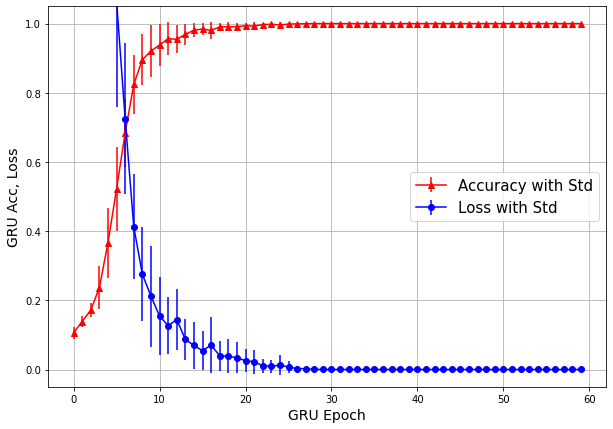

In [67]:
ACC, LOSS, acc_std, loss_std = [], [], [], []
x = np.arange(0,60)
tmp_lst_acc, tmp_lst_loss = [], []

for j in range(60):
    tmp, tmp_lst_acc = 0, []
    for i in range(1, 16):
        tmp = tmp + globals()['acc{}'.format(i)][j]
        tmp_lst_acc.append(globals()['acc{}'.format(i)][j])
        
    ACC.append(tmp/15)
    acc_std.append(np.std(tmp_lst_acc))

    
for j in range(60):
    tmp, tmp_lst_loss = 0, []
    for i in range(1, 16):
        tmp = tmp + globals()['loss{}'.format(i)][j]
        tmp_lst_loss.append(globals()['loss{}'.format(i)][j])
        
    loss_std.append(np.std(tmp_lst_loss))
    LOSS.append(tmp/15)

plt.figure(figsize = (10,7))
plt.errorbar(x, ACC, yerr = acc_std, label='Accuracy with Std', c='r', marker='^')
#plt.plot(ACC, c='r')


plt.errorbar(x, LOSS, yerr = loss_std, label='Loss with Std', c='b', marker='o')
#plt.plot(LOSS, c='b', )

plt.ylim(-0.05,1.05)
plt.legend(fontsize=15)
plt.grid(True)
plt.ylabel('GRU Acc, Loss', fontsize=14)
plt.xlabel('GRU Epoch', fontsize=14)
plt.show()

In [ ]:
np.std(gru_acc), np.mean(gru_acc)

In [ ]:
np.std(converge_epoch), np.mean(converge_epoch)

In [ ]:
# GRU - faster convergence